In [1]:
from utils.config import FitSettings
from utils.dataProcessor import DataProcessor
from utils.templateMaker import TemplateMaker
from utils.signalExtractor import SignalExtractor

import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import os

import mplhep as hep
hep.style.use(hep.style.ALICE)

# Read the data
When the data is read it must be defined in the following way: output folder containing subfolders corresponding to the datasets. 

In [2]:
directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/"
#directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/030225_tableReaderwME/"
#directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/190325_nominalCuts/"
datasets = [
    #"DQ_LHC22_pass7_skimmed_dielectron_kaon",
    "DQ_LHC24aj_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24af_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24ag_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24al_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24am_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24an_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24ao_pass1_skimmed_dielectron_kaon"
]

In [3]:
settings = FitSettings()
processor = DataProcessor(directory_to_TRoutput_from_HL, datasets, verbose=False, settings=settings)

# Read the dataset
total_data, _ = processor.read_data(read_ME=False)

******* DATASET: DQ_LHC24aj_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24af_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24ag_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24al_pass1_skimmed_dielectron_kaon
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1572020/AO2D.root
⚠️ Dataframe is empty. 554322, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571953/AO2D.root/hy_1571953 is not being read properly
⚠️ Dataframe is empty. 554207, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571945/AO2D.root/hy_1571945 is not being read properly
⚠️ Dataframe is empty. 554201, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571943/AO2D.root/hy_157

In [4]:
# Preprocess the data (removing nan and relabeling columns)
total_data = processor.pre_processing(total_data)

⚠️ WARNING: 8 candidates pass no cuts - fIsJpsiFromBSelected =0 
⚠️ WARNING: 8 candidates pass no cuts - fIsBarrelSelected =0 


In [5]:
# Translate from bitmap columns and create columns with cuts being passed
config_cuts, name_electron_cuts, name_kaon_cuts = processor.read_cuts_from_configfile()

In [6]:
# This returns a warning if there is a mismatch in the entries in the histograms of the AnalyisResults.root file and the derived dataset
processor.compare_to_AnalysisResult(total_data, verbose=False)

⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24af_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24ag_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24am_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24an_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24ao_pass1_skimmed_dielectron_kaon/AnalysisResults.root file no

In [7]:
#plot_bins = np.linspace(3, 10, 500)
#processor.plot_datasets(total_data, bins=plot_bins)

# Read MC

In [8]:
# reading a single AO2D.root.file 
#list_of_dataframes, _ = mc_processor.read_AO2D(MCdatapath, _, _, _, "dileptonAOD.root")
#local_run_df = pd.concat(list_of_dataframes, ignore_index=True) if list_of_dataframes else pd.DataFrame()

In [9]:
MCdatapath = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/"
mc_processor = DataProcessor(MCdatapath, ["LHC25b17"], verbose=False, settings=settings)

# Read the dataset
total_mc, _ = mc_processor.read_data(read_ME=False)

******* DATASET: LHC25b17
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651883/AO2D.root
⚠️ Dataframe is empty. 556370, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651756/AO2D.root/hy_1651756 is not being read properly
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651749/AO2D.root
⚠️ Dataframe is empty. 555965, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651743/AO2D.root/hy_1651743 is not being read properly
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651680/AO2D.root
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651673/AO2D.root
⚠️ Dataframe is empty. 554322, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_

In [10]:
total_mc = mc_processor.pre_processing(total_mc)

⚠️ WARNING: 11 candidates pass no cuts - fIsJpsiFromBSelected =0 
⚠️ WARNING: 11 candidates pass no cuts - fIsBarrelSelected =0 


In [11]:
mc_config_cuts, mc_name_electron_cuts, mc_name_kaon_cuts = mc_processor.read_cuts_from_configfile()

In [12]:
mc_processor.compare_to_AnalysisResult(total_mc, verbose=False)

# Apply cuts

In [13]:
data_with_cuts = total_data
mc_with_cuts = total_mc

tauCut = 0.0004
chi2cut = 2

In [14]:
data_with_cuts = data_with_cuts.loc[data_with_cuts["fTauxyBcandidate"] > tauCut]
mc_with_cuts = mc_with_cuts.loc[mc_with_cuts["fTauxyBcandidate"] > tauCut]

In [15]:
data_with_cuts = data_with_cuts.loc[data_with_cuts["fChi2Bcandidate"] < chi2cut]
mc_with_cuts = mc_with_cuts.loc[mc_with_cuts["fChi2Bcandidate"] < chi2cut]

In [16]:
jpsi_minMass = 2.8
jpsi_maxMass = 3.2
data_with_cuts = data_with_cuts.loc[(data_with_cuts["fMassDileptonCandidate"] > jpsi_minMass)&(data_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]
mc_with_cuts = mc_with_cuts.loc[(mc_with_cuts["fMassDileptonCandidate"] > jpsi_minMass)&(mc_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]

# Signal extraction

Ratio of Correlated Background to Signal: 0.82
Correlated background shifted by 10.89 MeV


/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_34575/1715685719.py:165: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


Text(0.1, 0.6, '\n$B^\\pm \\to J/\\psi(\\to e^+e^-) + K^\\pm$\n$|\\mathit{y}| <$ 0.9, $6 < \\mathit{p}_T <$ 8 GeV/$\\mathit{c}$ \n$\\chi^2$/ndof = 1.54\nSignal size = 207 $\\pm$ 18\n$S/\\sqrt{S+B}$ = 11.44\n')

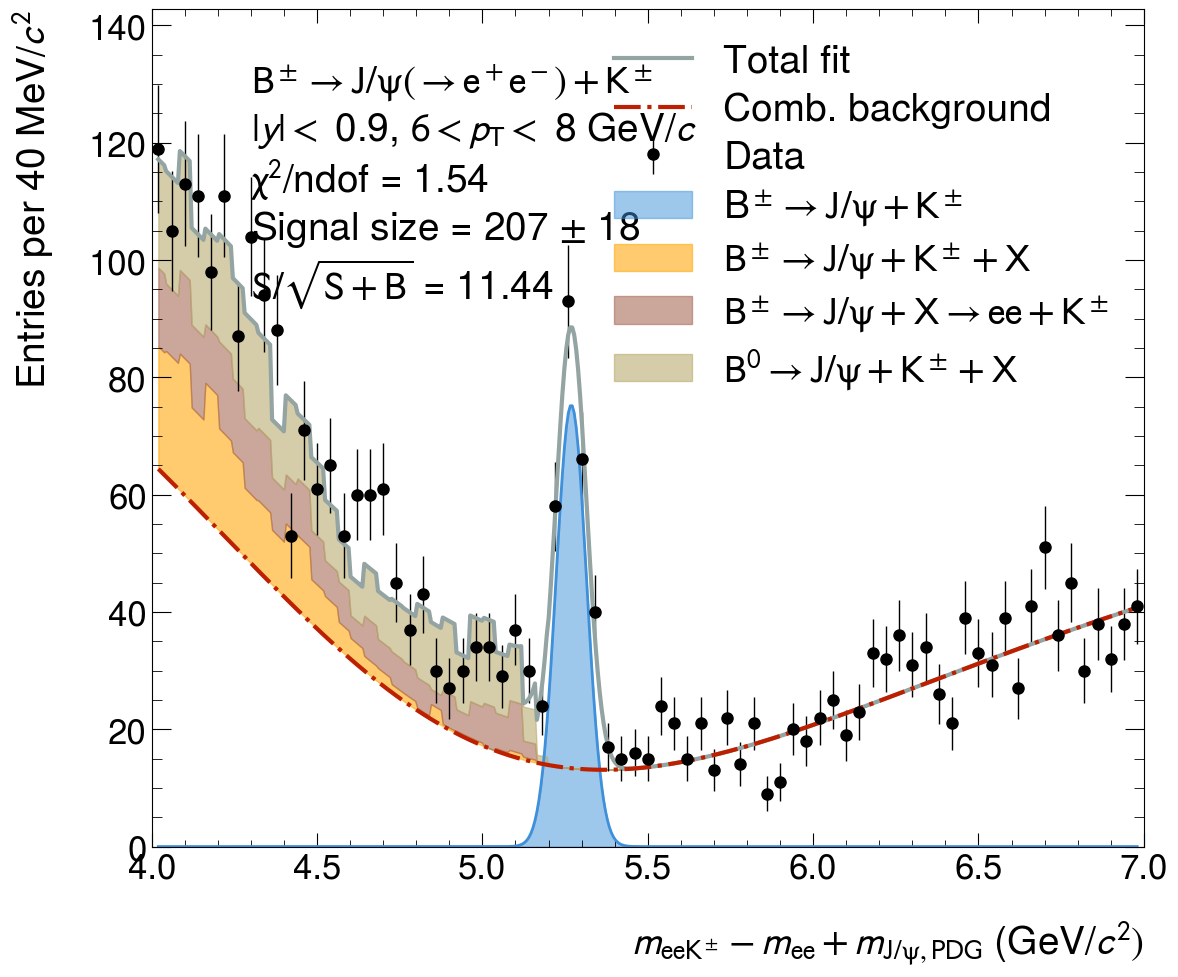

In [54]:
    settings5 = FitSettings(pTmin=6, pTmax=8, fitMin=4.0, fitMax=7.0, bin_width=0.04, kde_window=0.01, allowed_fluctuation_for_corrbkg=0.1)

    # generate MC templates
    templateMaker5 = TemplateMaker(mc_with_cuts, settings=settings5)
    corrbkg_template, kde_corrbkg_template, template_bins, mc_signal_mass, mc_fraction_of_corrbkg = templateMaker5.generate_mc_templates()
    #templateMaker6.plot_mc_signals()

    extractor = SignalExtractor(data_with_cuts, settings=settings5, combkg_function="ratio_second_degree_polynomials")
    # initialize SE with output from template maker 
    #extractor.mc_signal_mass = mc_signal_mass
    extractor.fraction_of_correlated_background = mc_fraction_of_corrbkg
    extractor.template_bins = template_bins
    extractor.corrbkg_template_counts = kde_corrbkg_template

    # perform fit etc.
    extractor.bin_data()
    extractor.fit()
    extractor.calculate_signal_size()
    extractor.fit() 

    fig, ax = extractor.plot_invariant_mass(legend_loc="upper right")
    #plt.ylim(0, 1)
    ax.text(0.1, 0.6, extractor.generate_plot_text(), transform=ax.transAxes, fontsize=settings4.fontsize)
    #if save_figures==True: plt.savefig('figures/QM2025_SEbin4.pdf')